# Поиск компонент сильной связности в графе

## Определения

Вершины u, v называются **сильно связанными**, если в графе G существует путь (необязательно прямой) u→v и v→u.

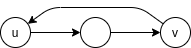

**Компоненты сильной связности** - максимальные подграфы являющиеся сильно связанными

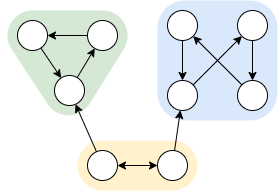

**Инвертирование графа** - смена направлений всех рёбер в графе на противоположные (двунаправленное ребро остаётся самим собой).

**Такт DFS из вершины v** - обход (в глубину) всех вершин графа, достижимых из v. Такт можно интерпретировать как рекурсивный вызов функции DFS. Такт обработки вершины, у которой нет соседей, будет равняться 1.

**Время выхода из рекурсии для вершины** - номер шага (перемещения от одного ребра к другому) в рекурсии DFS. 

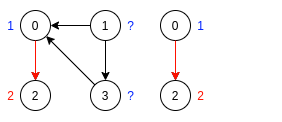

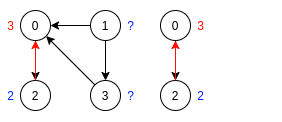

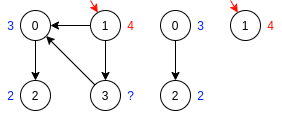

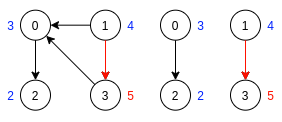

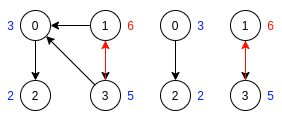

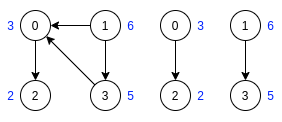


## Алгоритм Косарайю

Алгоритм Косарайю предназначен для поиска компонент сильной связности в ориентированном графе и состоит из трёх шагов:

- Выполнить поиск в глубину (DFS), пока не будут «помечены» все вершины. Вершина считается «помеченной», когда ей присвоено время выхода из рекурсии.

- Инвертировать исходный граф.

- Выполнить DFS в порядке убывания пометок вершин.

Полученные деревья каждого такта DFS последнего шага являются компонентами сильной связности

In [ ]:
from collections import defaultdict

class Graph:
    def __init__(self):
        # Initialize the graph using defaultdict to store adjacency lists
        self.graph = defaultdict(list)
        self.vertices = set()
    
    def add_edge(self, u, v):
        """Add a directed edge from vertex u to vertex v"""
        self.graph[u].append(v)
        self.vertices.add(u)
        self.vertices.add(v)
    
    def transpose(self):
        """Create a transpose graph by reversing all edges"""
        g_transpose = Graph()
        for u in self.graph:
            # For each edge u->v, add edge v->u in transposed graph
            for v in self.graph[u]:
                g_transpose.add_edge(v, u)
        return g_transpose
    
    def dfs_first_pass(self, vertex, visited, finishing_times):
        """First DFS pass to compute finishing times"""
        visited[vertex] = True
        
        # Recursively visit all adjacent vertices
        for adj_vertex in self.graph[vertex]:
            if not visited[adj_vertex]:
                self.dfs_first_pass(adj_vertex, visited, finishing_times)
        
        # Add vertex to finishing_times after exploring all its neighbors
        finishing_times.append(vertex)
    
    def dfs_second_pass(self, vertex, visited, scc):
        """Second DFS pass to find SCCs"""
        visited[vertex] = True
        scc.append(vertex)
        
        # Recursively visit all adjacent vertices
        for adj_vertex in self.graph[vertex]:
            if not visited[adj_vertex]:
                self.dfs_second_pass(adj_vertex, visited, scc)
    
    def find_sccs(self):
        """Main function to find strongly connected components"""
        # Step 1: First DFS pass on original graph
        visited = {vertex: False for vertex in self.vertices}
        finishing_times = []
        
        # Process all vertices in first DFS pass
        for vertex in self.vertices:
            if not visited[vertex]:
                self.dfs_first_pass(vertex, visited, finishing_times)
        
        # Step 2: Create transpose graph
        transposed_graph = self.transpose()
        
        # Step 3: Second DFS pass on transposed graph
        visited = {vertex: False for vertex in self.vertices}
        sccs = []
        
        # Process vertices in order of decreasing finishing time
        for vertex in reversed(finishing_times):
            if not visited[vertex]:
                current_scc = []
                transposed_graph.dfs_second_pass(vertex, visited, current_scc)
                sccs.append(current_scc)
        
        return sccs

# Пример
def example_usage():
    g = Graph()
    
    # Add edges to create a graph with multiple SCCs
    edges = [(1, 2), (2, 3), (3, 1),  # First SCC: 1-2-3
            (4, 5), (5, 6), (6, 4),  # Second SCC: 4-5-6
            (3, 4), (5, 7)]          # Additional edges
    
    for u, v in edges:
        g.add_edge(u, v)
    
    sccs = g.find_sccs()
    
    print("Strongly Connected Components:")
    for i, scc in enumerate(sccs, 1):
        print(f"SCC {i}: {scc}")

if __name__ == "__main__":
    example_usage()

### Сложность алгоритма

Поиск в глубину в исходном графе выполняется за O(V+E)

Для того, чтобы инвертировать все ребра в графе, представленном в виде списка смежности потребуется O(V+E) действий. Для матричного представления графа не нужно выполнять никакие действия для его инвертирования (индексы столбцов будут использоваться в качестве индексов строк и наоборот)

Количество рёбер в инвертированном равно количеству рёбер в изначальном графе, поэтому поиск в глубину будет работать за O(V+E)

В итоге получаем, что при оценке снизу сложность алгоритма — O(V+E).

# Поиски кратчайшего пути
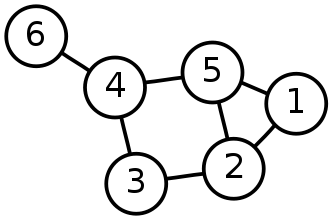

# Алгоритм поиска в ширину (breadth-first search, BFS) 

позволяет найти кратчайшие пути из одной вершины невзвешенного (ориентированного или неориентированного) графа до всех остальных вершин. 

Что такое кратчайший путь?

## Алгоритм:
Ищем расстояние между двумя вершинами, делая один шаг вниз по всем доступным из текущей вершины путям, а затем возвращаясь назад.

 - Начинаем с _а_
 - Отмечаем все вершины, доступные из _а_ за один шаг - для них кратчайшее расстояние = 1
 - Для каждого последующего уровня графа кратчайшее расстояние до _а_ будет на 1 больше, чем для рассматриваемой вершины
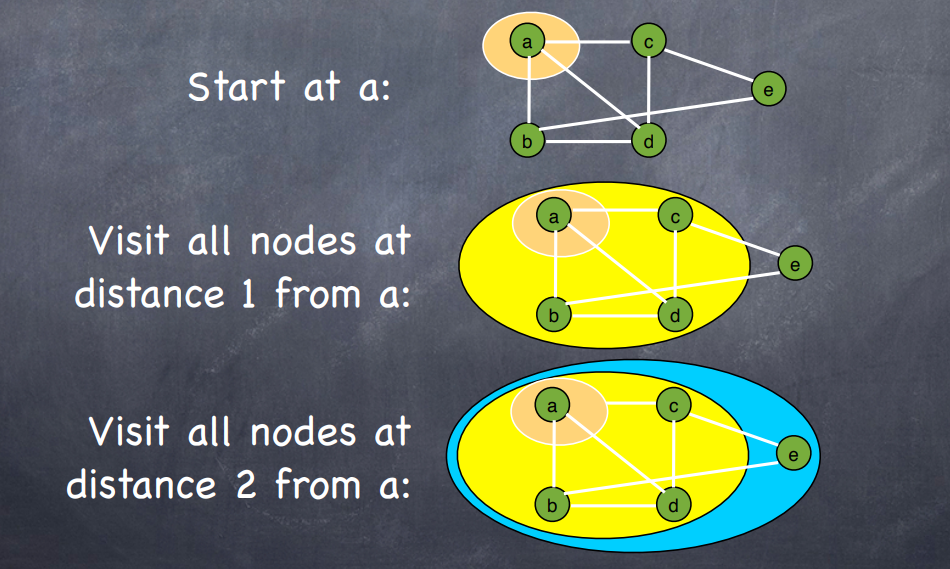

## Реализация

- Для каждой вершины храним кратчайшее расстояние до этой вершины либо None. 

 - Расстояние до начальной вершины устанавливаем 0. 
 - Перебираем все вершины, до которых расстояние равно 0, перебираем смежные с ними вершины и для них записываем расстояние равное 1. 
 - Перебираем все вершины, до которых расстояние равно 1, перебираем их соседей, записываем для них расстояние, равное 2, если оно до этого было None. 
 - Перебираем вершины, до которых расстояние было равно 2 и тем самым определяем вершины, до которых расстояние равно 3 и т. д. 
 - Цикл повторяется пока обнаруживаются новые вершины либо n−1 раз (где n – число вершин в графе), так как длина кратчайшего пути в графе не может превосходить n−1.

Эффективно?

### Нет!

Объяснение:
На каждом шаге перебираются все вершины с отбором тех, которые были обнаружены на последнем шаге. Для эффективной реализации следует использовать очередь.


In [ ]:
# n - количество вершин
# start - старт обхода графа
# V - представление графа списком смежности
D = [None] * (n + 1)
D[start] = 0
Q = [start]
Qstart = 0
while Qstart < len(Q):
    u = Q[Qstart]
    Qstart += 1 
    for v in V[u]: 
        if D[v] is None: 
            D[v] = D[u] + 1 
            Q.append(v)

В очередь закладываются вершины после того, как до них будет определено кратчайшее расстояние. То есть очередь содержит вершины, которые были «обнаружены» алгоритмом, но не были рассмотрены исходящие ребра из этих вершин. 

Из очереди последовательно извлекаются вершины, рассматриваются все исходящие из них ребра. Если ребро ведет в не обнаруженную до этого вершину, то есть расстояние до новой вершины не определено, то оно устанавливается равным на единицу больше, чем расстояние до обрабатываемой вершины, а новая вершина добавляется в конец очереди.

Таким образом, если из очереди извлечена вершина с расстоянием d, то в конец очереди будут добавляться вершины с расстоянием d+1, то есть в любой момент исполнения алгоритма очередь состоит из вершин, удаленных на расстояние d, за которыми следуют вершины, удаленные на расстояние d+1.


# Алгоритм Дейкстры

назван в честь голландского ученого Эдсгера Дейкстры (Edsger Dijkstra). 
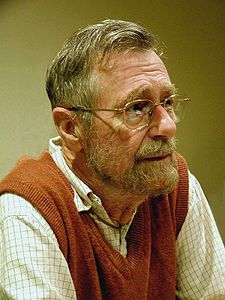
"Computer Science is no more about computers than astronomy is about telescopes."


Алгоритм предложен в 1959 году для нахождения кратчайших путей от одной вершины до всех остальных в ориентированном взвешенном графе, при условии, что все ребра в графе имеют неотрицательные веса.


В первой модели (матрица весов, аналог матрицы смежности) будем считать, что вес ребра из вершины i в вершину j равен w[i][j], то есть в матрице w хранятся веса ребра для любых двух вершин. Если из вершины i в вершину j нет ребра, то w[i][j]==INF для некоторого специального значения константы INF. 


https://www.cs.usfca.edu/~galles/visualization/Dijkstra.html


Алгоритм Дейкстры  - «жадный». 
 - Пусть расстояние от начальной вершины start до вершины i хранится в массиве dist[i]. 
 - Начальные значения dist[start]=0, dist[i]=INF для всех остальных вершин i. 
 - Алгоритм будет постепенно улучшать значения в массиве dist, в результате получит кратчайшие расстояния до всех вершин.


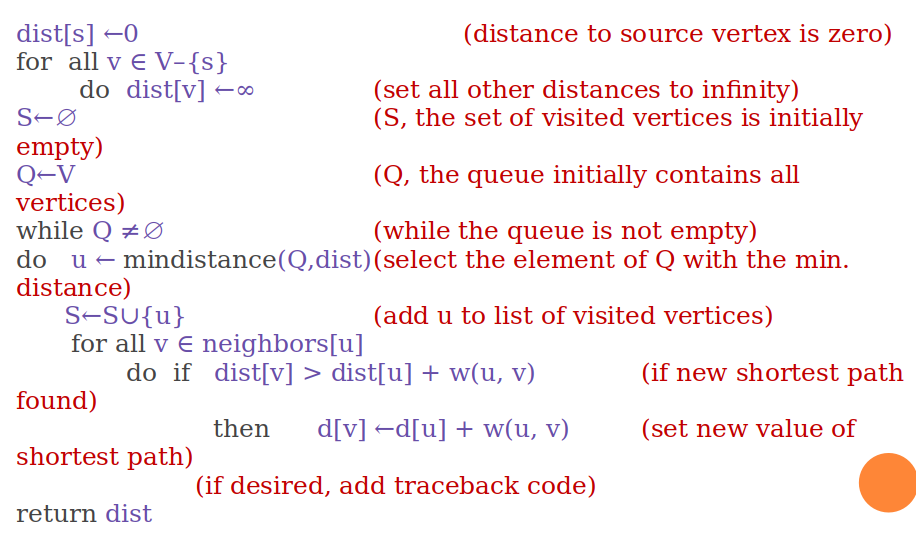

In [ ]:
# used - была ли покрашена вершина
# INF - большая константа
# dist - массив для записи вычисленных расстояний
# n - количество вершин
# start - старт обхода графа
# w - представление графа матрицей весов

INF = 10 ** 10
dist = [INF] * n
dist[start] = 0
used = [False] * n
min_dist = 0
min_vertex = start
 while min_dist < INF:
    i = min_vertex 
    used[i] = True 
    for j in range(n): 
        if dist[j] > dist[i] + w[i][j]: 
            dist[j] = dist[i] + w[i][j] 
    min_dist = INF
    for j in range(n):
        if not used[j] and dist[j] < min_dist:
            min_dist = dist[j]
            min_vertex = j

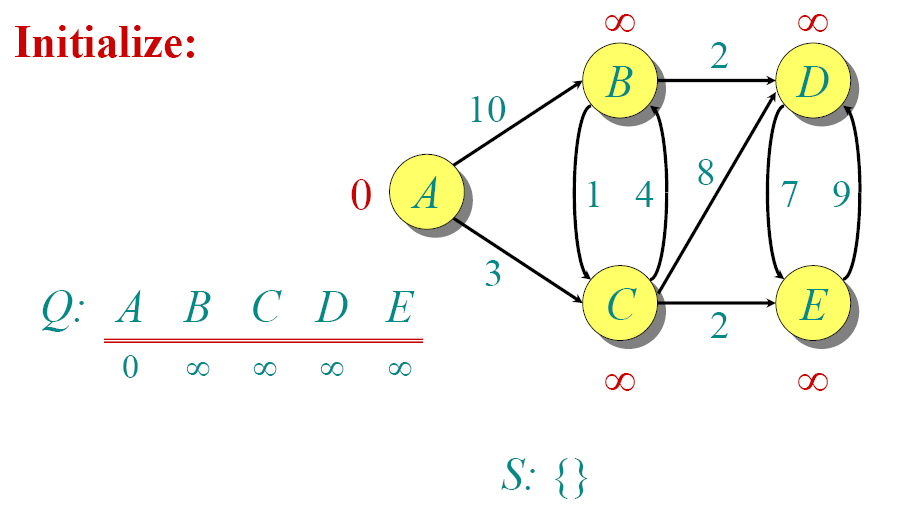
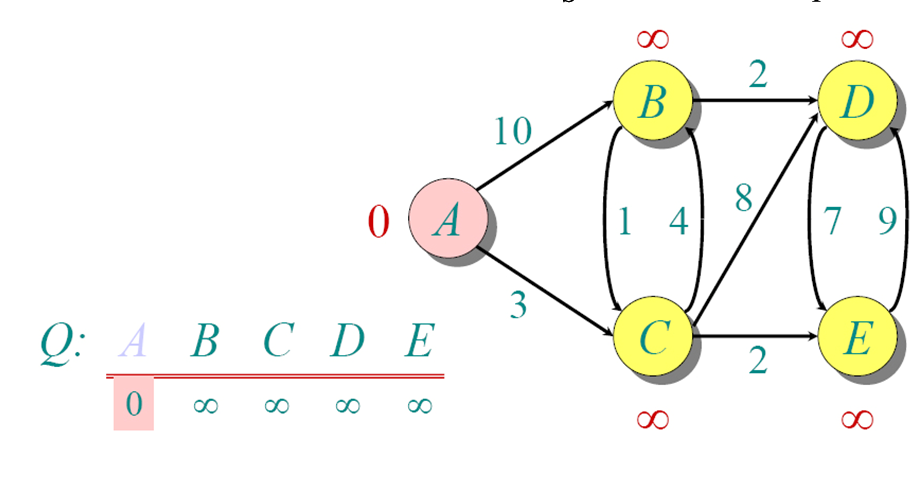
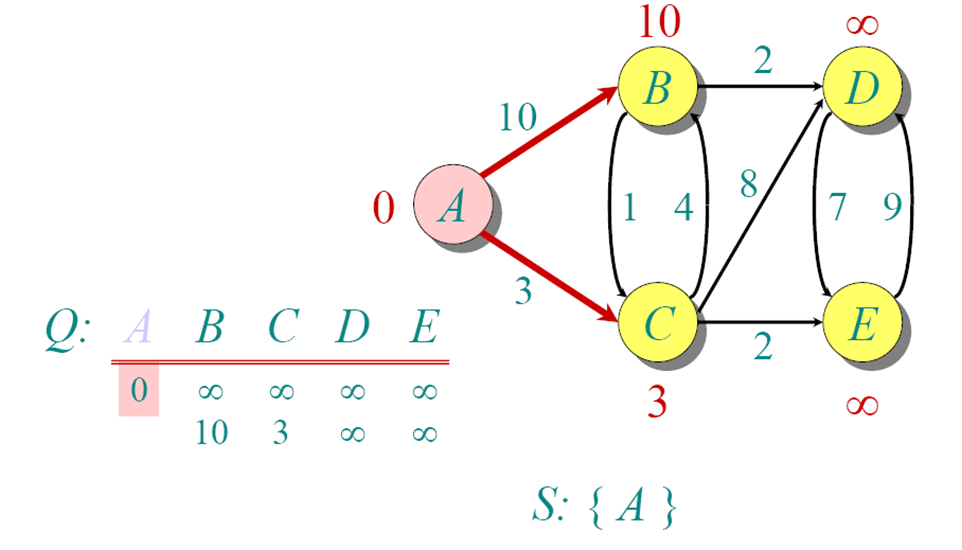
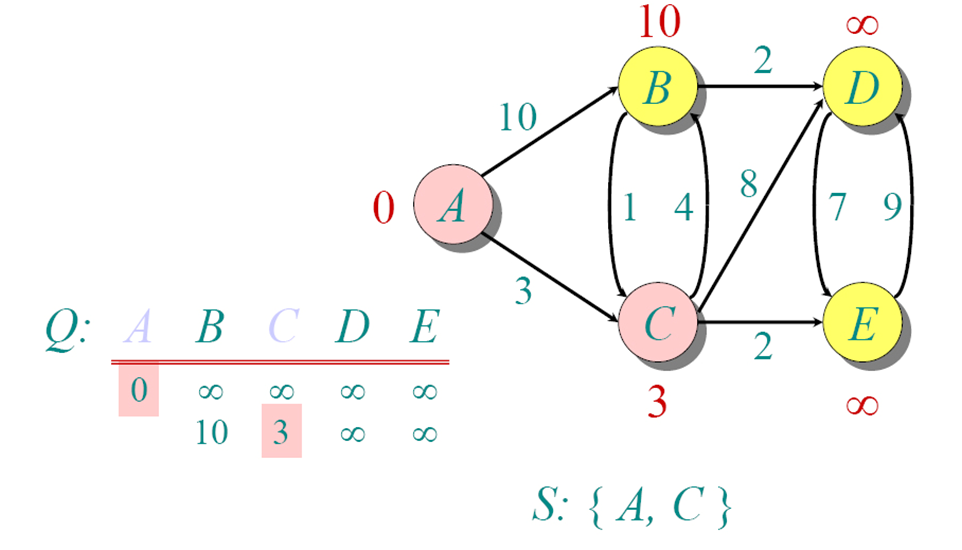
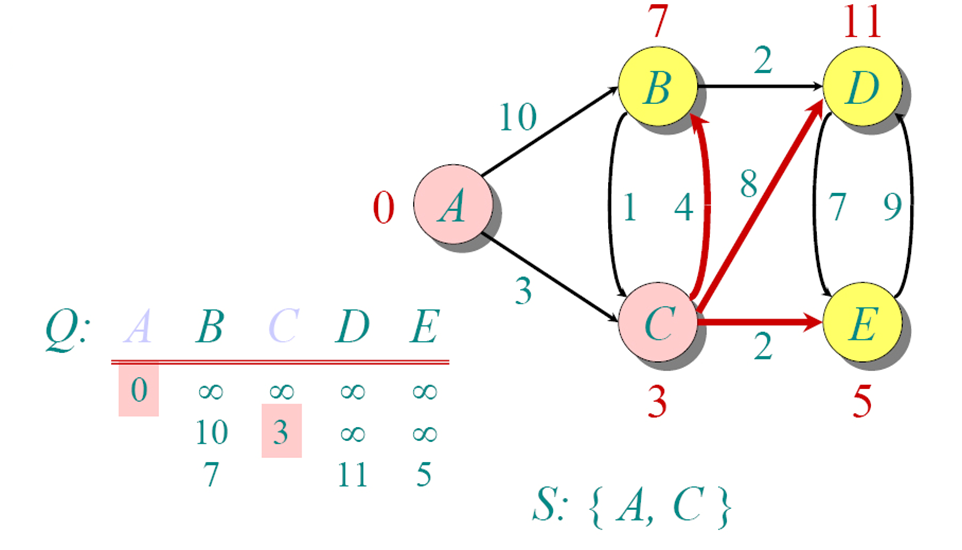
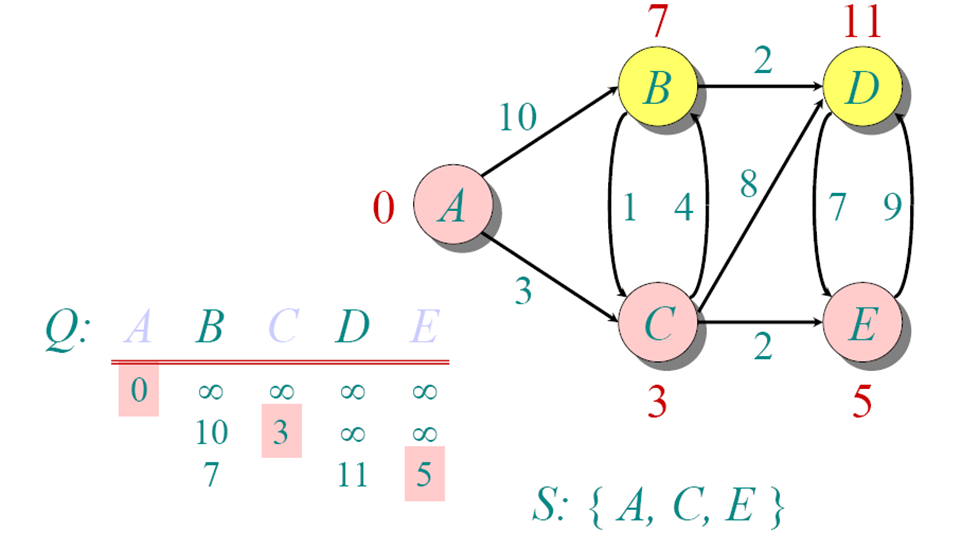
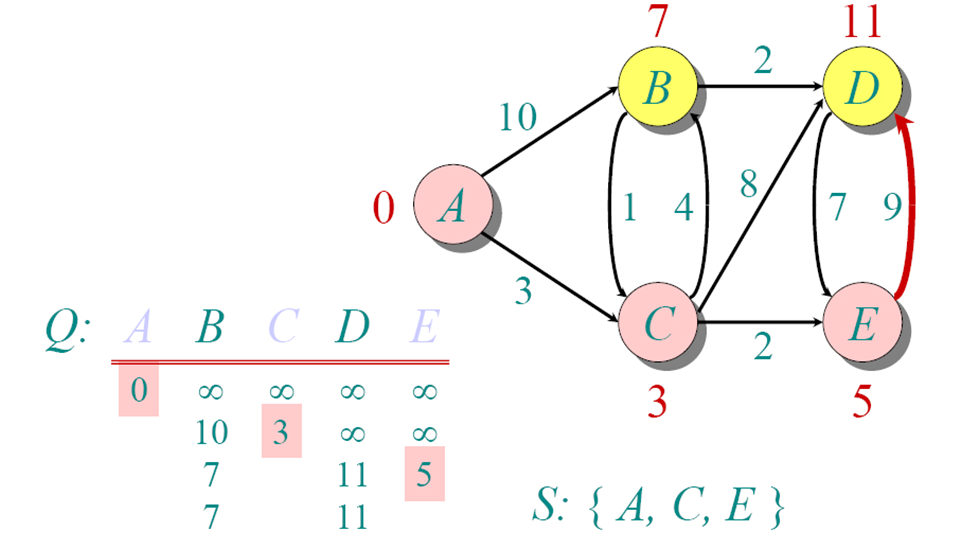
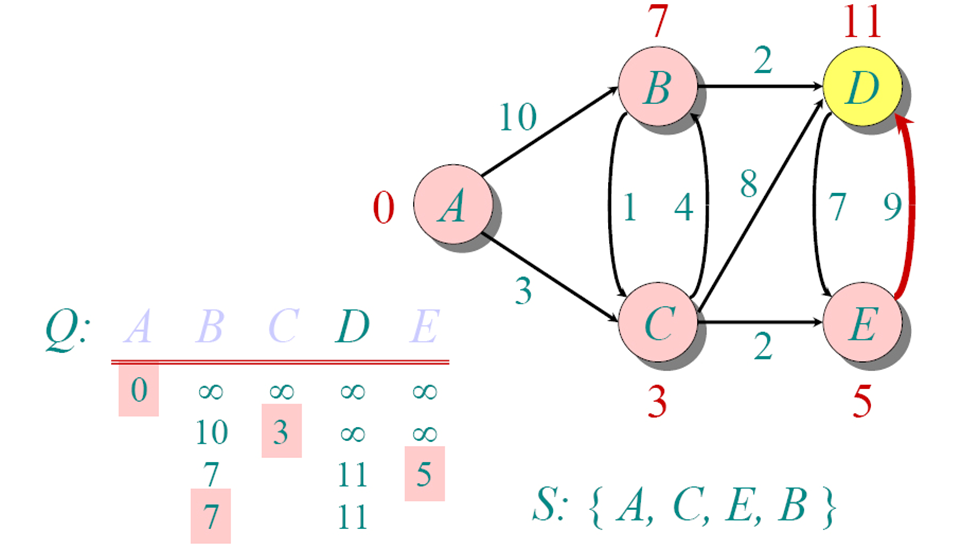
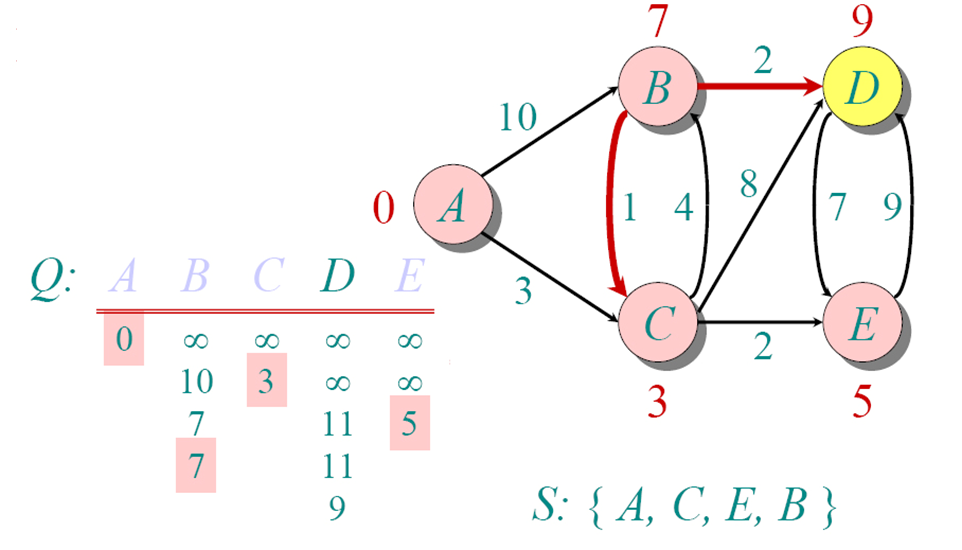
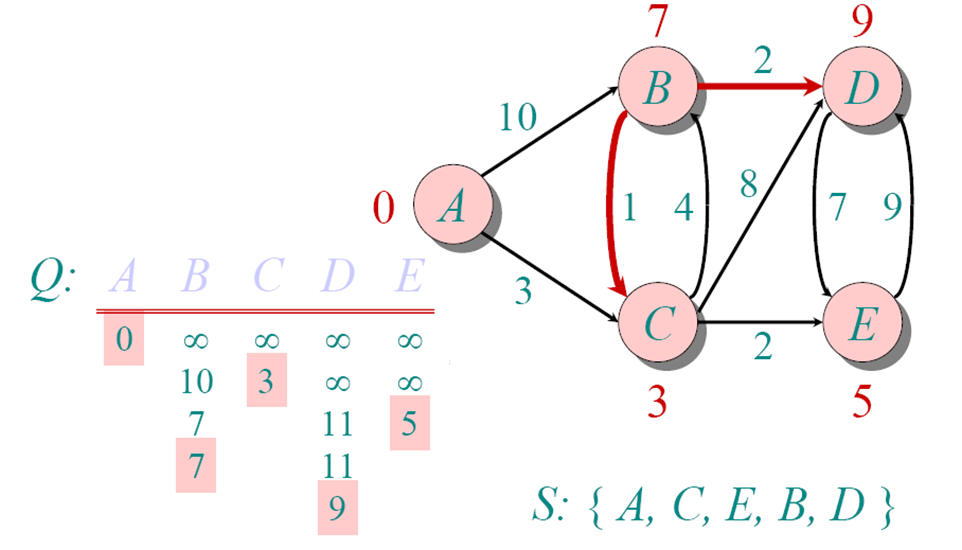


## Пояснения

Релаксация ребра
- Пусть из вершины i в вершину j есть ребро веса w[i][j], при этом выполнено неравенство dist[i] + w[i][j] < dist[j]. 
- То есть можно построить маршрут из начальной вершины до вершины i и добавить к нему ребро из i в j, и суммарная стоимость такого маршрута будет меньше, чем известная ранее стоимость маршрута из начальной вершины в вершину j. Тогда можно улучшить значение dist[j], присвоив dist[j] = dist[i] + w[i][j].

В алгоритме Дейкстры вершины красятся в два цвета, будем говорить, что вершина «неокрашенная» или «окрашенная». Изначально все вершины неокрашенные. Если алгоритм Дейкстры покрасил вершину i, то это означает, что найденное значение dist[i] является наилучшим возможным и в последствии не будет улучшаться, то есть значение dist[i] является кратчайшим расстоянием от начальной вершины до вершины i. Если же вершина не покрашена, то величина dist[i] для такой вершины i равна кратчайшему пути из вершины start до вершины i, который проходит только по покрашенным вершинам (за исключением самой вершины i).

На каждом шаге алгоритма Дейкстры красится одна новая вершина. В качестве такой вершины выбирается неокрашенная вершина i с наименьшим значением D[i]. Затем рассматриваются все ребра, исходящие из вершины i, и производится релаксация этих ребер, то есть улучшаются расстояния до вершин, смежных с i.

Алгоритм заканчивается, когда на очередном шаге не останется неокрашенных вершин или если расстояние до всех неокрашенных вершин будет равно INF (то есть эти вершины являются недостижимыми).

# Подробный пример реализации

In [15]:
import sys


graf = {'A': {'B': 1, 'D': 1, 'C': 3},
        'B': {'A': 1, 'E': 5},
        'C': {'A': 3, 'D': 1},
        'D': {'A': 1, 'C': 1, 'E': 3, 'F': 9},
        'E': {'B': 5, 'D': 3, 'G': 7},
        'G': {'E': 7, 'F': 8},
        'F': {'D': 9, 'G': 8}
        }
#возвращает красивым списочком все вершины графа
def all_vertex(graf):
    return list(graf.keys())
print(all_vertex(graf))

#возвращаем не менее красивым списочком всех соседей данной вершины
def vertex_neighbors(graf, vertex):
    return list(graf[vertex].keys())
print(vertex_neighbors(graf, 'D'))

#возвращаем длину ребра между двумя вершинами
def value(graf, vertex1, vertex2):
    return(graf[vertex1][vertex2])
print(value(graf, 'A', 'D'))

def dijkstra(graf, start):
    unvisited_vertexes = all_vertex(graf)
    shortest_path = {}
    previous_vertex = {}

#по умолчанию расстояния между любыми двумя вершинами задаем равным бесконечности,
# а затем в цикле while переопределяем на минимально возможное 
    max_value = sys.maxsize
    for vertex in unvisited_vertexes:
        shortest_path[vertex] = max_value
    shortest_path[start] = 0

    while unvisited_vertexes:
        #ищем вершину с меньшей оценкой
        current_min_vertex = None
        for vertex in unvisited_vertexes:
            if current_min_vertex == None:
                current_min_vertex = vertex
            elif shortest_path[vertex] < shortest_path[current_min_vertex]:
                current_min_vertex = vertex
        neighbors = vertex_neighbors(graf, current_min_vertex)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_vertex] + value(graf, current_min_vertex, neighbor)
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                previous_vertex[neighbor] = current_min_vertex
        unvisited_vertexes.remove(current_min_vertex)
    return previous_vertex, shortest_path

def print_result(previous_vertex, shortest_path,
                 start_vertex, target_vertex):
    path = []
    vertex = target_vertex
    while vertex != start_vertex:
        path.append(vertex)
        vertex = previous_vertex[vertex]
    path.append(start_vertex)
    print("->".join(reversed(path)))
    print(shortest_path[target_vertex])
previous_vertex, shortest_path = dijkstra(graf, 'A')
print_result(previous_vertex, shortest_path, 'A', 'F')


            

['A', 'B', 'C', 'D', 'E', 'G', 'F']
['A', 'C', 'E', 'F']
1
A->D->F
10


# адачи

1. Вы работаете в компании социальной сети, которая хочет проанализировать группы пользователей, которые часто взаимодействуют друг с другом. На платформе пользователи могут фолловить друг друга. Компания хочет идентифицировать кластеры пользователей, которые сильно связаны друг с другом.
Помогите компании решить эту задачу, реализовав функцию find_social_clusters:
    -  Функция принимает количество пользователей (n) и список отношений между ними
    -  Возвращает двумерный список групп сильной связанности
    -  Группы должны быть отсортированы по размеру в порядке убывания
    -  В каждой группе идентификаторы пользователей должны быть отсортированы в порядке возрастания


2. На шахматной доске n × n в некоторой клетке расположен конь. Для каждой клетки найдите минимальное число шагов коня для её достижения. Асимптотика: O(n2).



3. Стоимостью пути можно считать не сумму всех весов входящих в него рёбер, а некие другие функции. Покажите, как (и можно ли вообще) модифицировать алгоритм Дейкстры для следующих функций стоимости пути:

    - максимальный среди весов используемых рёбер;
    - произведение весов рёбер (все веса имеют вес хотя бы 1);
    - конкатенация строк, написанных на рёбрах;
    - минимальный среди весов используемых рёбер, только теперь стоимость пути нужно максимизировать;

считаем, что все вершины раскрашены в какие-то цвета, а рёбра имеют неотрицательные длины; нужно в первую очередь минимизировать количество смен цвета, во вторую — суммарную рёбер.